In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.tri import Triangulation

from scipy.interpolate import griddata

In [2]:
name = 'scan_sun_1_10142023_'

In [3]:
az_meas = np.load(name+'az_meas.npy')
el_meas = np.load(name+'el_meas.npy')
raw_samples = np.load(name+'raw_samples.npy')

In [4]:
pwrs = np.zeros(raw_samples.shape[0])
for i in range(az_meas.shape[0]):
    pwrs[i] = 10*np.log10(np.mean(np.abs(raw_samples[i])**2))

(30.0, 38.0)

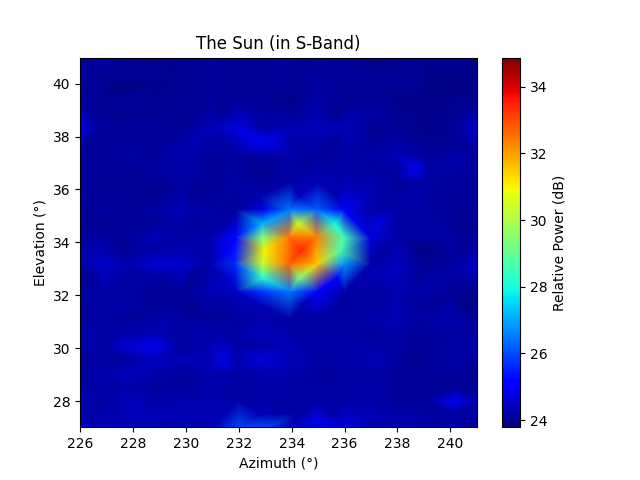

In [5]:
plt.figure()
plt.title("The Sun (in S-Band)")
plt.ylabel("Elevation (°)")
plt.xlabel("Azimuth (°)")
shift = 3
plt.tripcolor(az_meas[:-shift], el_meas[:-shift], pwrs[shift:], shading='gouraud', cmap='jet')
#plt.scatter(az_meas, el_meas, c=pwrs)
plt.colorbar(label="Relative Power (dB)")
plt.axis('equal')
plt.xlim((226, 241))
plt.ylim((30, 38))
#plt.grid()

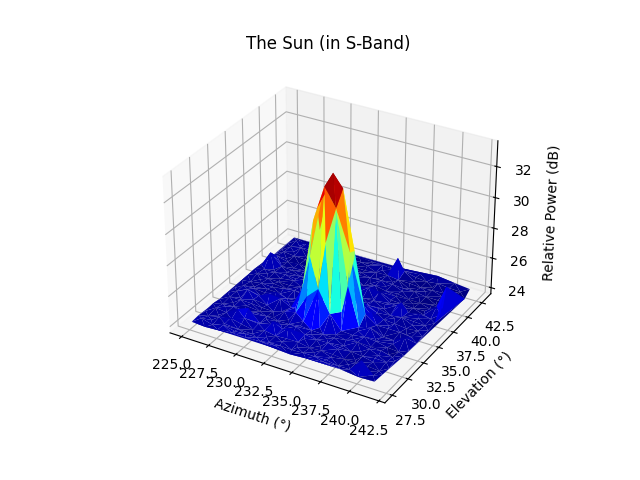

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title("The Sun (in S-Band)")
ax.set_ylabel("Elevation (°)")
ax.set_xlabel("Azimuth (°)")
ax.set_zlabel("Relative Power (dB)")

az_shift = az_meas[:-shift]
el_shift = el_meas[:-shift]
pwrs_shift = pwrs[shift:]

xmin = 225
xmax = 242
ymin = 27
ymax = 45

idxs = (xmax > az_shift)&(az_shift > xmin)&(ymax > el_shift)&(el_shift > ymin)

surf = ax.plot_trisurf(az_shift[idxs], el_shift[idxs], pwrs_shift[idxs], antialiased=True, cmap='jet')

ax.set_aspect("equalxy")

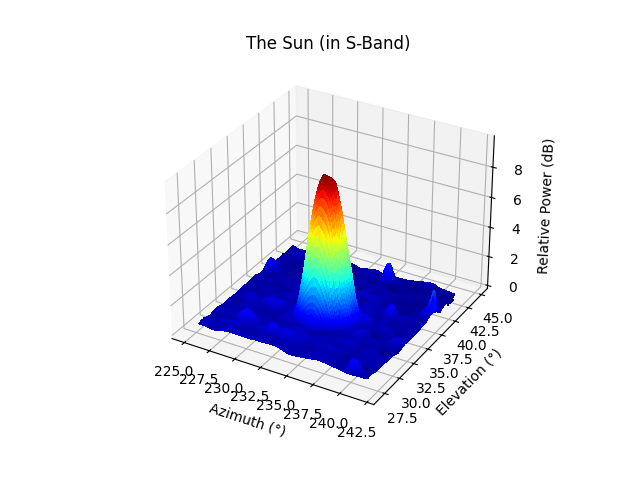

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title("The Sun (in S-Band)")
ax.set_ylabel("Elevation (°)")
ax.set_xlabel("Azimuth (°)")
ax.set_zlabel("Relative Power (dB)")

az_shift = az_meas[:-shift]
el_shift = el_meas[:-shift]
pwrs_shift = pwrs[shift:]

xmin = 225
xmax = 242
ymin = 27
ymax = 45

idxs = (xmax > az_shift)&(az_shift > xmin)&(ymax > el_shift)&(el_shift > ymin)

res = 0.1

az_grid = np.arange(xmin, xmax, res)
el_grid = np.arange(ymin, ymax, res)

pwrs_interp = griddata(np.vstack((az_shift[idxs], el_shift[idxs])).T, pwrs_shift[idxs], (az_grid[:,np.newaxis], el_grid[np.newaxis]), method='cubic')

surf = ax.plot_surface(az_grid[:,np.newaxis], el_grid[np.newaxis], pwrs_interp - np.nanmin(pwrs_interp), 
    rstride=1, cstride=1,
    cmap='jet', linewidth=0, antialiased=False)

ax.set_aspect("equalxy")

(30.0, 38.0)

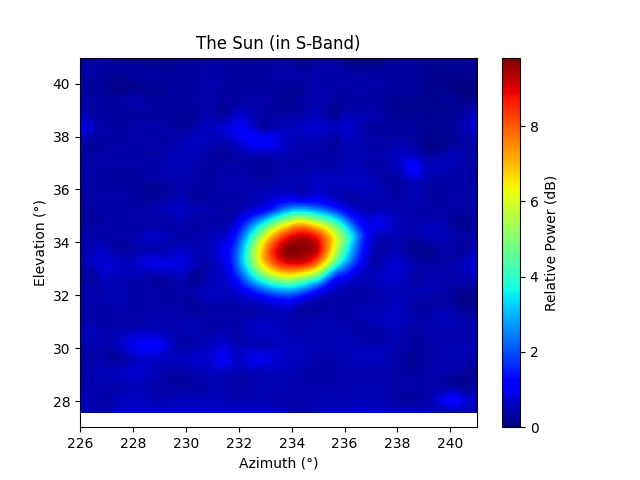

In [8]:
plt.figure()
plt.title("The Sun (in S-Band)")
plt.ylabel("Elevation (°)")
plt.xlabel("Azimuth (°)")
plt.imshow(pwrs_interp.T - np.nanmin(pwrs_interp), extent=[az_grid[0], az_grid[-1], el_grid[-1], el_grid[0]], cmap='jet')
plt.colorbar(label="Relative Power (dB)")
plt.axis('equal')
plt.xlim((226, 241))
plt.ylim((30, 38))
#plt.grid()

In [9]:
power_idxs = np.where(pwrs > 30)[0]

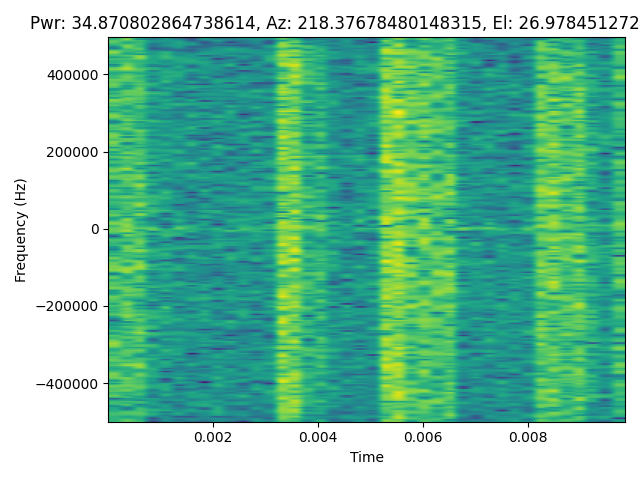

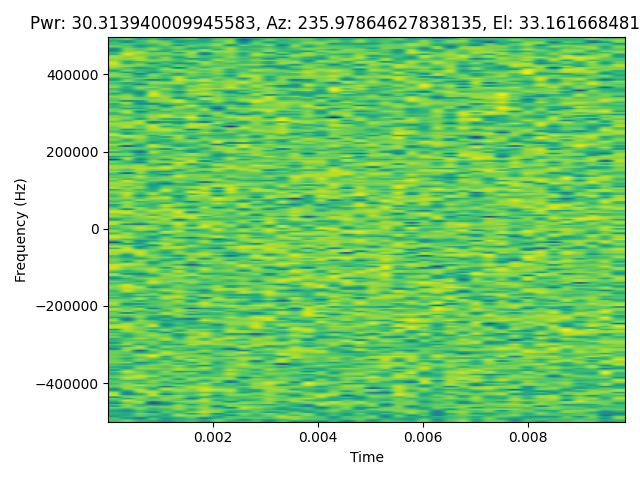

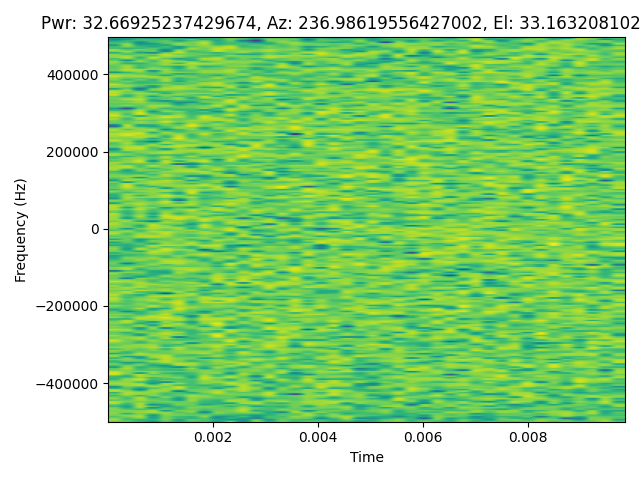

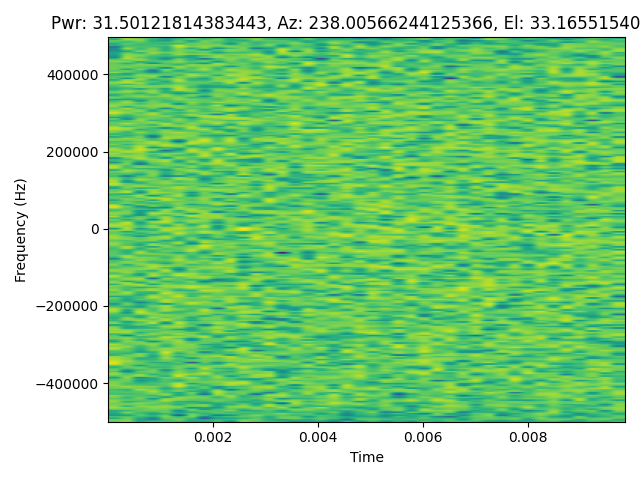

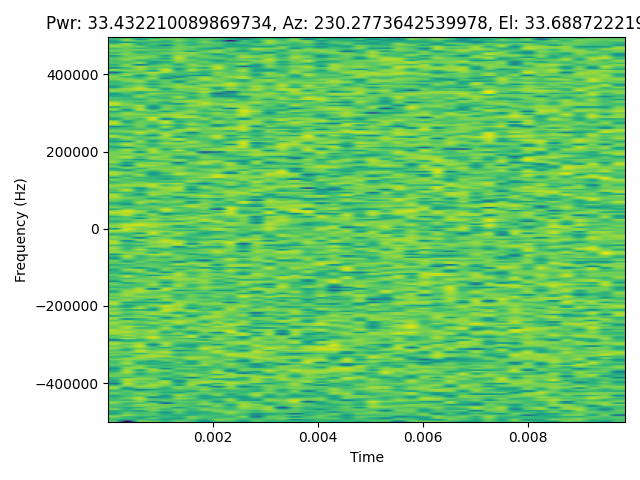

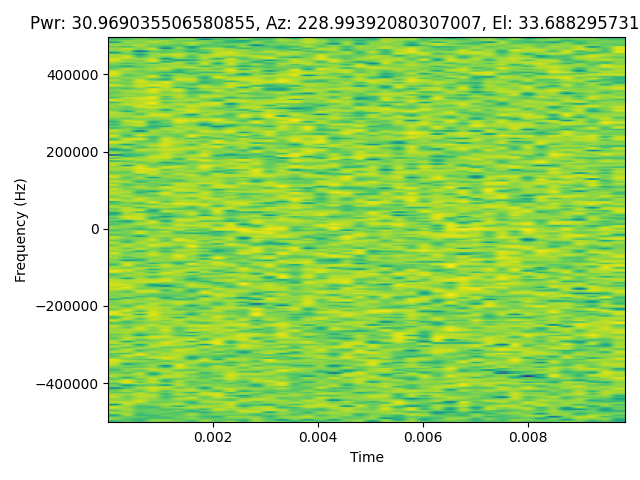

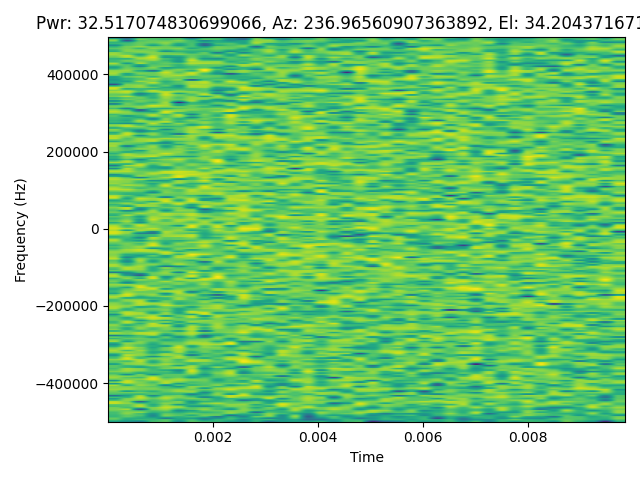

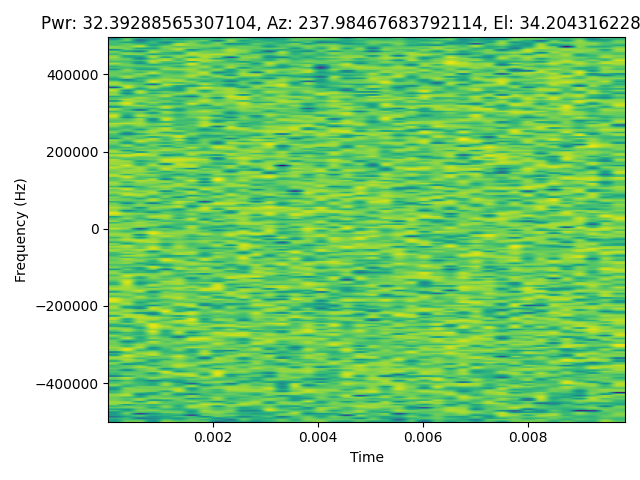

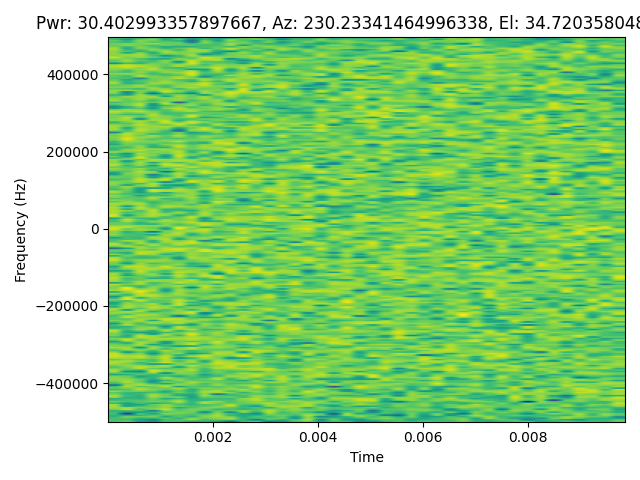

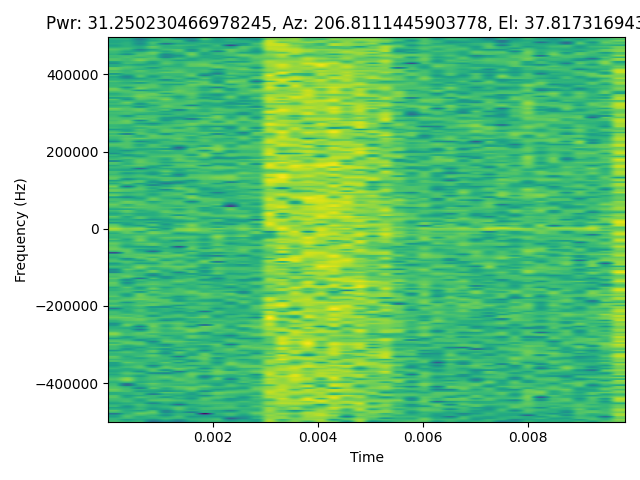

In [10]:
NFFT = 256
Fs = 1e6

for idx in power_idxs:

    plt.figure()
    plt.title(f"Pwr: {pwrs[idx]}, Az: {az_meas[idx]}, El: {el_meas[idx]}")
    plt.xlabel("Time")
    plt.ylabel("Frequency (Hz)")
    Pxx, freqs, bins, im = plt.gca().specgram(raw_samples[idx], NFFT=NFFT, Fs=Fs, noverlap=10)
    plt.tight_layout()